In [1]:
import numpy as np

In [3]:
# Read the English sentences
with open('english.txt', 'r', encoding='utf-8') as f:
    english_sentences = [line.strip() for line in f.readlines()]

In [4]:
print(english_sentences[:10])

['I have come to a decision.', 'Oh! what`s that?', 'I don’t want to go to Kandy.', 'I have been thinking about it.', 'It sounds fun.', 'But I don’t want to do it.', 'What did you just say?', 'Who are you?', 'I`ll take water samples.', 'I can help you.']


In [12]:
# Read the English sentences
with open('sinhala.txt', 'r', encoding='utf-8') as f:
    sinhala_sentences = [line.strip() for line in f.readlines()]

In [13]:
print(sinhala_sentences[:10])

['මම තීරණයටකට ඇවිත් ඉන්නේ.', 'ඇත්තට . මොකද්ද ඒ?', 'මට නුවර යන්න ඕනේ නෑ.', 'මම ඒ ගැන හිත හිතා උන්නා.', 'ඒක ෆන් වගේ.', 'ඒත් මට ඒක කරන්න ඕනේ නෑ.', 'මොකද්ද ඔයා මේ දැන් කිව්වේ?', 'ඔයා කවුද?', 'මම ජල සාම්පල ගන්නම්.', 'මට පුළුවන් ඔයාට උදව් කරන්න.']


In [7]:
# Function to calculate the count of words in a sentence
def sentence_length(sentence):
  leghth_of_words = len(sentence.split())
  return leghth_of_words

In [8]:
english_length = []
for sentence in english_sentences:
  english_length.append(sentence_length(sentence))

In [9]:
print(english_length[:10])

[6, 3, 7, 6, 3, 7, 5, 3, 4, 4]


In [14]:
sinhala_length = []
for sentence in sinhala_sentences:
  sinhala_length.append(sentence_length(sentence))

In [15]:
print(sinhala_length[:10])

[4, 4, 5, 6, 3, 6, 5, 2, 4, 5]


In [20]:
n = len(english_length)
print(n)

100


In [21]:
m = len(sinhala_length)
print(m)

100


In [108]:
# Initialize the cost matrix
cost_matrix = np.zeros((n+1, m+1))

In [109]:
gap_cost = 450

In [110]:
cost_matrix[:, 0] = np.arange(n+1) * gap_cost
cost_matrix[0, :] = np.arange(m+1) * gap_cost

In [111]:
cost_matrix

array([[    0.,   450.,   900., ..., 44100., 44550., 45000.],
       [  450.,     0.,     0., ...,     0.,     0.,     0.],
       [  900.,     0.,     0., ...,     0.,     0.,     0.],
       ...,
       [44100.,     0.,     0., ...,     0.,     0.,     0.],
       [44550.,     0.,     0., ...,     0.,     0.,     0.],
       [45000.,     0.,     0., ...,     0.,     0.,     0.]])

In [113]:
# Fill the cost matrix
for i in range(1, n + 1):
  for j in range(1, m + 1):
    cost_match = cost_matrix[i - 1, j - 1] + abs(english_length[i - 1] - sinhala_length[j - 1])
    cost_gap_s = cost_matrix[i - 1, j] + gap_cost
    cost_gap_t = cost_matrix[i, j - 1] + gap_cost
    cost_matrix[i, j] = min(cost_match, cost_gap_s, cost_gap_t)

In [114]:
cost_matrix

array([[0.000e+00, 4.500e+02, 9.000e+02, ..., 4.410e+04, 4.455e+04,
        4.500e+04],
       [4.500e+02, 2.000e+00, 4.520e+02, ..., 4.365e+04, 4.410e+04,
        4.455e+04],
       [9.000e+02, 4.510e+02, 3.000e+00, ..., 4.320e+04, 4.365e+04,
        4.410e+04],
       ...,
       [4.410e+04, 4.365e+04, 4.320e+04, ..., 1.050e+02, 5.550e+02,
        1.005e+03],
       [4.455e+04, 4.410e+04, 4.365e+04, ..., 5.550e+02, 1.060e+02,
        5.560e+02],
       [4.500e+04, 4.455e+04, 4.410e+04, ..., 1.005e+03, 5.560e+02,
        1.080e+02]])

In [120]:
alignments = []
i, j = n, m

In [121]:
while i > 0 and j > 0:
  if i > 0 and j > 0 and cost_matrix[i, j] == cost_matrix[i - 1, j - 1] + abs(english_length[i - 1] - sinhala_length[j - 1]):
    alignments.append((i - 1, j - 1))
    i -= 1
    j -= 1
  elif i > 0 and cost_matrix[i, j] == cost_matrix[i - 1, j] + gap_cost:
    alignments.append((i - 1, j))
    i -= 1
  else:
    alignments.append((i, j - 1))
    j -= 1

In [139]:
alignments[:20]

[(99, 99),
 (98, 98),
 (97, 97),
 (96, 96),
 (95, 95),
 (94, 94),
 (93, 93),
 (92, 92),
 (91, 91),
 (90, 90),
 (89, 89),
 (88, 88),
 (87, 87),
 (86, 86),
 (85, 85),
 (84, 84),
 (83, 83),
 (82, 82),
 (81, 81),
 (80, 80)]

In [123]:
sentence_alignments = []
for i, j in reversed(alignments):
  sentence_alignments.append((english_sentences[i], sinhala_sentences[j]))

In [124]:
sentence_alignments[:20]

[('I have come to a decision.', 'මම තීරණයටකට ඇවිත් ඉන්නේ.'),
 ('Oh! what`s that?', 'ඇත්තට . මොකද්ද ඒ?'),
 ('I don’t want to go to Kandy.', 'මට නුවර යන්න ඕනේ නෑ.'),
 ('I have been thinking about it.', 'මම ඒ ගැන හිත හිතා උන්නා.'),
 ('It sounds fun.', 'ඒක ෆන් වගේ.'),
 ('But I don’t want to do it.', 'ඒත් මට ඒක කරන්න ඕනේ නෑ.'),
 ('What did you just say?', 'මොකද්ද ඔයා මේ දැන් කිව්වේ?'),
 ('Who are you?', 'ඔයා කවුද?'),
 ('I`ll take water samples.', 'මම ජල සාම්පල ගන්නම්.'),
 ('I can help you.', 'මට පුළුවන් ඔයාට උදව් කරන්න.'),
 ('What happened?', 'මොකද උනේ?'),
 ('Did you see that?', 'ඔයා ඒක දැක්කද?'),
 ('Oh my god. Are you ok?', 'මගේ දෙයියනේ ! ඔයා හොඳින්ද?'),
 ('He ran over my foot.', 'ඔහු මගේ කකුල උඩින් වාහනේ අරන්ගියා.'),
 ('That`s a big deal.', 'ඒක ලොකු වැඩක්.'),
 ('That`s not a big deal.', 'ඒක ප්\u200dරශ්නයක් නෙමෙයි.'),
 ('Can I go there?', 'මම යන්නද එහේ?'),
 ('Will her mother be there?', 'ඇයගේ අම්මා එහේ ඉඳීද?'),
 ('That`s okay then.', 'හරි . ඒක ප්\u200dරශ්නයක් නෑ එහෙනම්.'),
 ('Yes, I think 

In [125]:
reversed_alignments = alignments[::-1]

In [126]:
reversed_alignments[:20]

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16),
 (17, 17),
 (18, 18),
 (19, 19)]

In [135]:
import matplotlib.pyplot as plt

In [136]:
english_indices, sinhala_indices = zip(*reversed_alignments)

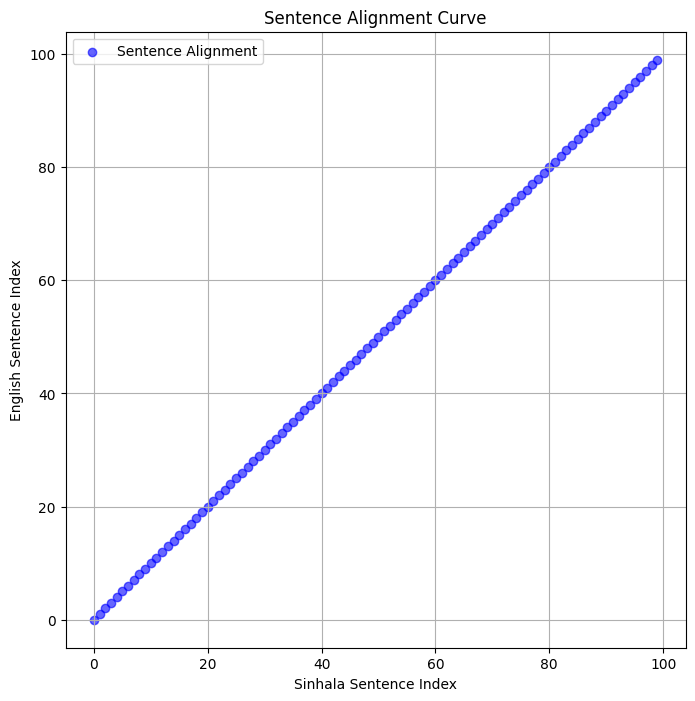

In [138]:
# Plot the alignment curve
plt.figure(figsize=(8, 8))
plt.scatter(sinhala_indices, english_indices, c='blue', label='Sentence Alignment', alpha=0.6)
plt.xlabel('Sinhala Sentence Index')
plt.ylabel('English Sentence Index')
plt.title('Sentence Alignment Curve')
plt.grid(True)
plt.legend()
plt.show()

# Calculate the accuracy

In [127]:
# Assume the true, correct alignments (ground truth) are 1-to-1 (sentence i corresponds to sentence i)
ground_truth_alignments = [(i, i) for i in range(len(sinhala_sentences))]  # For 100 sentences, it will be [(0, 0), (1, 1), ..., (99, 99)]

In [128]:
# Your predicted alignments from the Gale-Church algorithm
predicted_alignments = reversed_alignments  # Example: this comes from the output of your align_sentences() function

In [129]:
# Convert both ground truth and predicted alignments to sets (for easy comparison)
ground_truth_set = set(ground_truth_alignments)
predicted_set = set(predicted_alignments)

In [133]:
# Find the number of correct alignments (common elements between ground truth and predicted)
correct_alignments = ground_truth_set.intersection(predicted_set)
correct_alignments_count = len(correct_alignments)
print(correct_alignments_count)

100


In [131]:
accuracy = (len(correct_alignments) / len(ground_truth_set)) * 100
print(f"Accuracy: {accuracy:.2f}%")
accuracy

Accuracy: 100.00%


100.0